**NETWORK INTRUSION DETECTION SYSTEM USING MACHINE LEARNING ALGORITHMS**


**SPRINT 1: DATA EXPLORIZATION**

MOUNT GOOGLE DRIVE TO GOOGLE COLAB

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


IMPORTING ALL NECESSARY LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time

LOADING THE UNSWNB-15 DATASET FOR NETWORK INTRUSION DETECTION

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/dataset/UNSW_NB15.csv")

In [ ]:
df.shape

(175341, 45)

FEATURES IN DATASET INFORMATION

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

CHECKING FOR MISSING VALUES

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports  

CHECKING FOR DUPLICATE ROWS

In [ ]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print("Duplicate Rows:", duplicate_rows)

Duplicate Rows: 0


FEATURE NAMES LISTED

In [ ]:
feature_names = df.columns
print("Feature Names:")
for feature in feature_names:
    print(feature)

Feature Names:
id
dur
proto
service
state
spkts
dpkts
sbytes
dbytes
rate
sttl
dttl
sload
dload
sloss
dloss
sinpkt
dinpkt
sjit
djit
swin
stcpb
dtcpb
dwin
tcprtt
synack
ackdat
smean
dmean
trans_depth
response_body_len
ct_srv_src
ct_state_ttl
ct_dst_ltm
ct_src_dport_ltm
ct_dst_sport_ltm
ct_dst_src_ltm
is_ftp_login
ct_ftp_cmd
ct_flw_http_mthd
ct_src_ltm
ct_srv_dst
is_sm_ips_ports
attack_cat
label


DESCRIBE THE STATISTICS OF DATASET

In [ ]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe(include='all')

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,1.753410e+05,175341.000000,175341.000000,1.753410e+05,...,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,87671.000000,1.359389,20.298664,18.969591,8.844844e+03,1.492892e+04,9.540619e+04,179.546997,79.609567,7.345403e+07,...,5.383538,4.206255,8.729881,0.014948,0.014948,0.133066,6.955789,9.100758,0.015752,0.680622
std,50616.731112,6.480249,136.887597,110.258271,1.747656e+05,1.436542e+05,1.654010e+05,102.940011,110.506863,1.883574e+08,...,8.047104,5.783585,10.956186,0.126048,0.126048,0.701208,8.321493,10.756952,0.124516,0.466237
min,1.000000,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,43836.000000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.278614e+01,62.000000,0.000000,1.305334e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,87671.000000,0.001582,2.000000,2.000000,4.300000e+02,1.640000e+02,3.225807e+03,254.000000,29.000000,8.796748e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,131506.000000,0.668069,12.000000,10.000000,1.418000e+03,1.102000e+03,1.250000e+05,254.000000,252.000000,8.888889e+07,...,5.000000,3.000000,12.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,1.000000
max,175341.000000,59.999989,9616.000000,10974.000000,1.296523e+07,1.465555e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,...,51.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


ATTACK PROPORTION IN THE DATASET

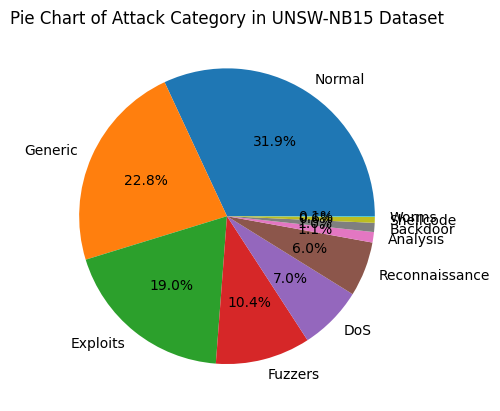

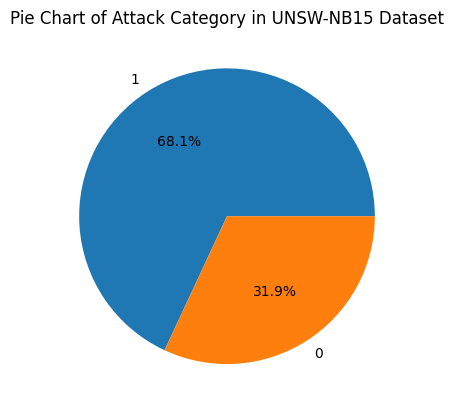

In [ ]:
# Get the attack category counts
attack_cat_counts = df['attack_cat'].value_counts()

# Create a pie chart of the attack category counts
plt.pie(attack_cat_counts.values, labels=attack_cat_counts.index, autopct="%1.1f%%")
plt.title("Pie Chart of Attack Category in UNSW-NB15 Dataset")
plt.show()
# Get the attack category counts
attack_cat_counts = df['label'].value_counts()
print("\n")
# Create a pie chart of the attack category counts
plt.pie(attack_cat_counts.values, labels=attack_cat_counts.index, autopct="%1.1f%%")
plt.title("Pie Chart of Attack Category in UNSW-NB15 Dataset")
plt.show()

HISTOGRAM OF THE ATTACK PROPORTION

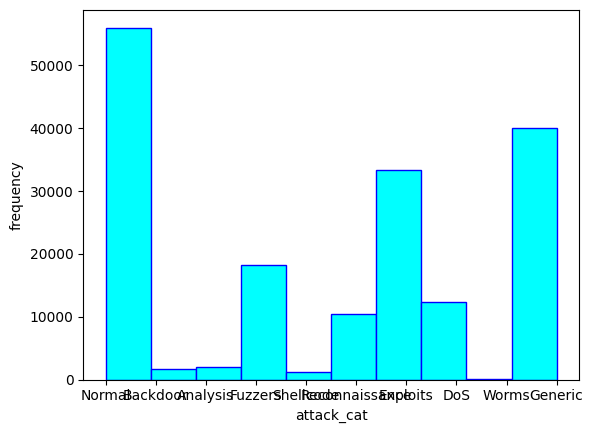

In [ ]:
plt.hist(df['attack_cat'], color="cyan", edgecolor="blue")
plt.xlabel("attack_cat")
plt.ylabel("frequency")
plt.show()

COUNT PLOT OF CATEGORICAL FEATURES

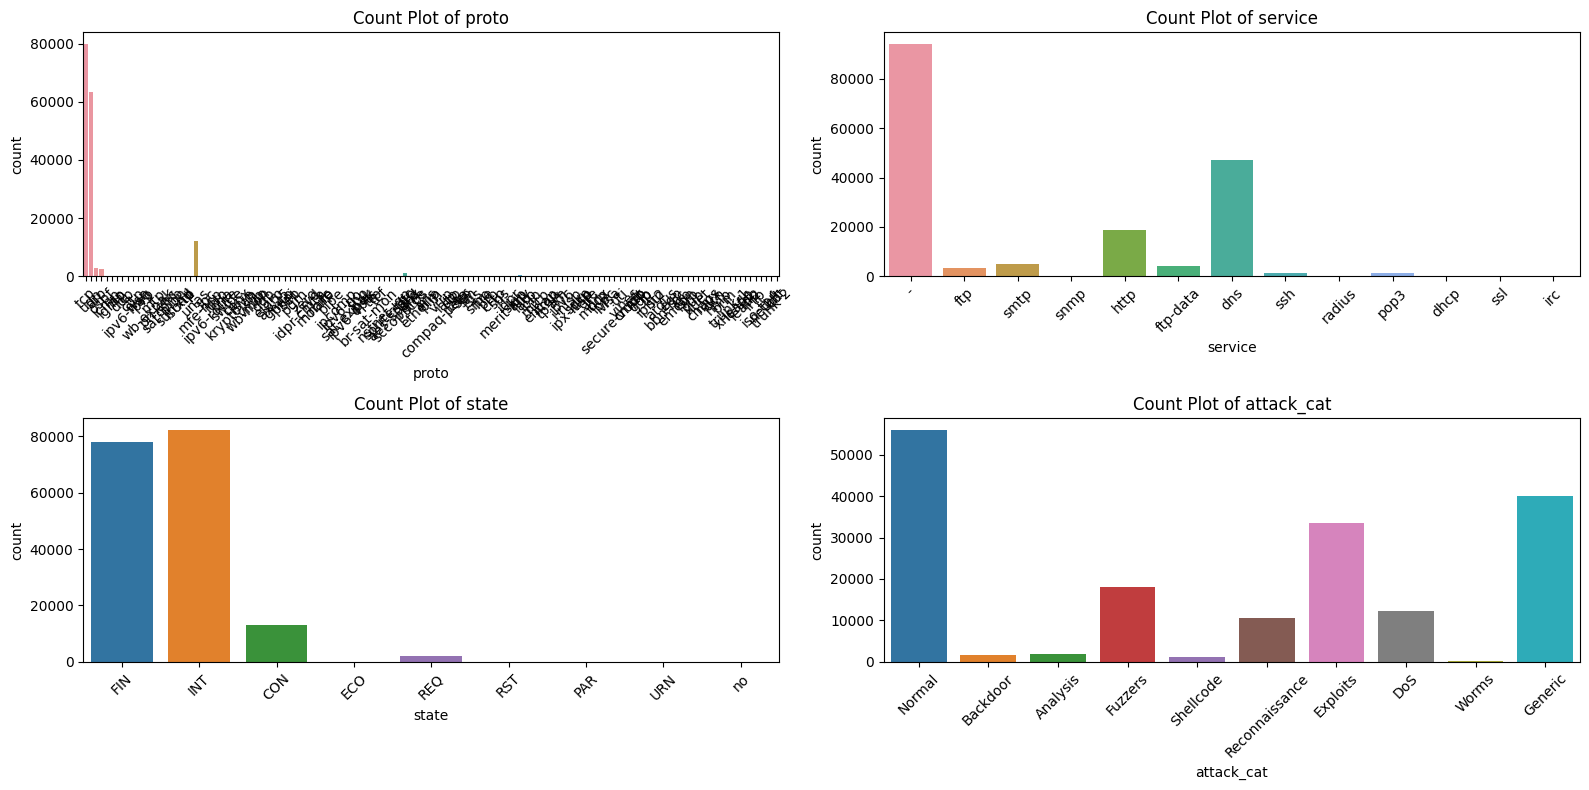

In [ ]:
# Select the four object data type columns
object_columns = ['proto', 'service', 'state', 'attack_cat']

# Create subplots for count plots
plt.figure(figsize=(16, 8))
for i, column in enumerate(object_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=column)
    plt.title(f"Count Plot of {column}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

BOXPLOT OF NUMERIC FEATURES

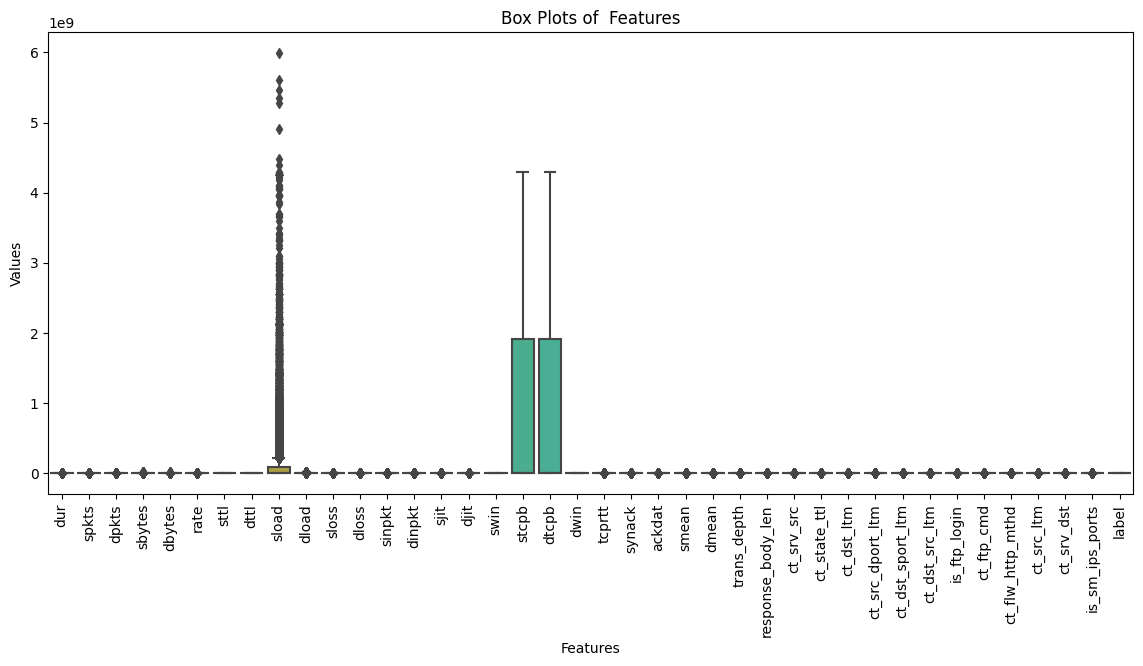

In [ ]:
feature_names=[ 'dur', 'spkts', 'dpkts', 'sbytes','dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss','sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin','tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth','response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm','ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm','is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm','ct_srv_dst', 'is_sm_ips_ports', 'label']

# Extract the  features from your dataset
_data = df[feature_names]

# Create a box plot for each of the features
plt.figure(figsize=(14, 6))  # Adjust the figure size as needed
sns.boxplot(data=_data)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title("Box Plots of  Features")
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()

In [ ]:
df_cat = df.select_dtypes(exclude=[np.number])
df_cat.describe(include='all')

,proto,service,state,attack_cat
count,175341,175341,175341,175341
unique,133,13,9,10
top,tcp,-,INT,Normal
freq,79946,94168,82275,56000


In [ ]:
df['attack_cat'].unique()

array(['Normal', 'Backdoor', 'Analysis', 'Fuzzers', 'Shellcode',
       'Reconnaissance', 'Exploits', 'DoS', 'Worms', 'Generic'],
      dtype=object)

In [ ]:
list_drop = ['id']

In [ ]:
df.drop(list_drop,axis=1,inplace=True)

In [ ]:
DEBUG =0

for feature in df_numeric.columns:
    if DEBUG == 1:
        print(feature)
        print('max = '+str(df_numeric[feature].max()))
        print('75th = '+str(df_numeric[feature].quantile(0.95)))
        print('median = '+str(df_numeric[feature].median()))
        print(df_numeric[feature].max()>10*df_numeric[feature].median())
        print('----------------------------------------------------')
    if df_numeric[feature].max()>10*df_numeric[feature].median() and df_numeric[feature].max()>10 :
        df[feature] = np.where(df[feature]<df[feature].quantile(0.95), df[feature], df[feature].quantile(0.95))

In [ ]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe(include='all')

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,...,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,0.467065,12.617323,10.006792,1697.289989,3648.210481,80957.198683,179.546997,79.609567,5.327025e+07,3.654831e+05,...,4.903263,4.145226,8.505609,0.014948,0.014948,0.101745,6.624788,8.882760,0.015752,0.680622
std,0.816099,17.574046,16.840623,3266.805316,9675.446827,108507.397039,102.940011,110.506863,7.771134e+07,1.011632e+06,...,6.544978,5.589185,10.339146,0.126048,0.126048,0.302313,7.307812,10.154088,0.124516,0.466237
min,0.000000,1.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,114.000000,0.000000,32.786140,62.000000,0.000000,1.305334e+04,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,0.001582,2.000000,2.000000,430.000000,164.000000,3225.806520,254.000000,29.000000,8.796748e+05,1.447023e+03,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,0.668069,12.000000,10.000000,1418.000000,1102.000000,125000.000300,254.000000,252.000000,8.888889e+07,2.784487e+04,...,5.000000,3.000000,12.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,1.000000
max,3.079511,64.000000,62.000000,13662.000000,39076.000000,333333.321500,255.000000,254.000000,2.666667e+08,4.071050e+06,...,22.000000,17.000000,33.000000,4.000000,4.000000,1.000000,26.000000,33.000000,1.000000,1.000000


In [ ]:
df_numeric = df.select_dtypes(include=[np.number])
df_before = df_numeric.copy()
DEBUG = 0
for feature in df_numeric.columns:
    if DEBUG == 1:
        print(feature)
        print('nunique = '+str(df_numeric[feature].nunique()))
        print(df_numeric[feature].nunique()>50)
        print('----------------------------------------------------')
    if df_numeric[feature].nunique()>50:
        if df_numeric[feature].min()==0:
            df[feature] = np.log(df[feature]+1)
        else:
            df[feature] = np.log(df[feature])

df_numeric = df.select_dtypes(include=[np.number])

In [ ]:
df_cat = df.select_dtypes(exclude=[np.number])
df_cat.describe(include='all')

,proto,service,state,attack_cat
count,175341,175341,175341,175341
unique,133,13,9,10
top,tcp,-,INT,Normal
freq,79946,94168,82275,56000


In [ ]:
DEBUG = 0
for feature in df_cat.columns:
    if DEBUG == 1:
        print(feature)
        print('nunique = '+str(df_cat[feature].nunique()))
        print(df_cat[feature].nunique()>6)
        print(sum(df[feature].isin(df[feature].value_counts().head().index)))
        print('----------------------------------------------------')

    if df_cat[feature].nunique()>6:
        df[feature] = np.where(df[feature].isin(df[feature].value_counts().head().index), df[feature], '-')

In [ ]:
df_cat = df.select_dtypes(exclude=[np.number])
df_cat.describe(include='all')

,proto,service,state,attack_cat
count,175341,175341,175341,175341
unique,6,5,6,6
top,tcp,-,INT,Normal
freq,79946,100270,82275,56000


In [ ]:
proto_encoder = LabelEncoder()
service_encoder = LabelEncoder()
state_encoder = LabelEncoder()
attack_cat_encoder = LabelEncoder()


In [ ]:
df['proto_encoded'] = proto_encoder.fit_transform(df['proto'])
df['service_encoded'] = service_encoder.fit_transform(df['service'])
df['state_encoded'] = state_encoder.fit_transform(df['state'])
df['attack_cat_encoded'] = attack_cat_encoder.fit_transform(df['attack_cat'])


In [ ]:
df['proto'] = df['proto_encoded']
df['service'] = df['service_encoded']
df['state'] = df['state_encoded']
df['attack_cat'] = df['attack_cat_encoded']


In [ ]:
if not df['proto'].dtype.name == 'category':
    del df['proto_encoded']

if not df['service'].dtype.name == 'category':
    del df['service_encoded']

if not df['state'].dtype.name == 'category':
    del df['state_encoded']

if not df['attack_cat'].dtype.name == 'category':
    del df['attack_cat_encoded']


In [ ]:
import pandas as pd
import plotly.graph_objects as go
from sklearn.feature_selection import SelectKBest, chi2



# SelectKBest with chi2 score function
best_features = SelectKBest(score_func=chi2, k='all')

X = df.select_dtypes(include=['number'])  # Adjust the column selection as needed
y = df.iloc[:, -1]
fit = best_features.fit(X, y)

df_scores = pd.DataFrame(fit.scores_)
df_col = pd.DataFrame(X.columns)

feature_score = pd.concat([df_col, df_scores], axis=1)
feature_score.columns = ['feature', 'score']
feature_score.sort_values(by=['score'], ascending=False, inplace=True)  # Use 'ascending=False' to sort in descending order

# Create a bar plot for the top 20 features
top_20_features = feature_score.head(20)

fig = go.Figure(go.Bar(
    x=top_20_features['score'],
    y=top_20_features['feature'],
    orientation='h'
))

fig.update_layout(title="Top 20 Features",
                  height=800,  # Adjust the height as needed
                  xaxis_title="Score",
                  yaxis_title="Feature",
                  showlegend=False,
                  )

fig.show()


In [ ]:
df['attack_cat'].unique()

array([5, 0, 3, 2, 1, 4])

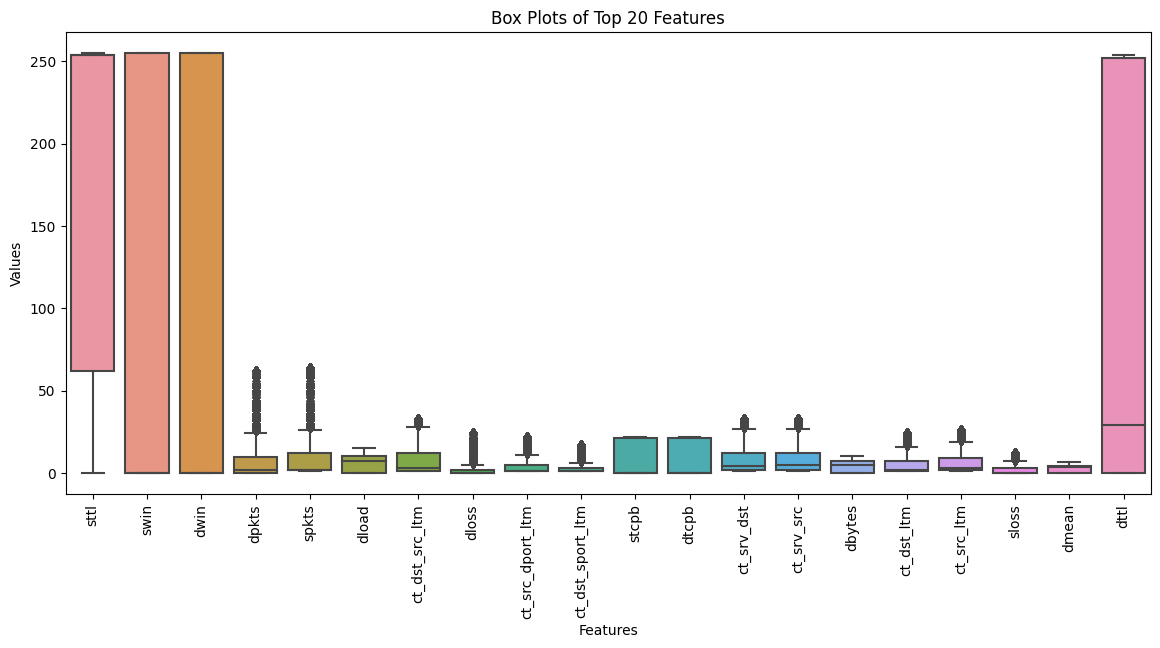

In [ ]:

# Specify the top 20 feature names
feature_names = ['sttl', 'swin', 'dwin', 'dpkts', 'spkts', 'dload', 'ct_dst_src_ltm', 'dloss', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'stcpb', 'dtcpb', 'ct_srv_dst', 'ct_srv_src', 'dbytes', 'ct_dst_ltm', 'ct_src_ltm', 'sloss', 'dmean', 'dttl']

# Extract the top 20 features from your dataset
top_20_data = df[feature_names]

# Create a box plot for each of the top 20 features
plt.figure(figsize=(14, 6))  # Adjust the figure size as needed
sns.boxplot(data=top_20_data)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title("Box Plots of Top 20 Features")
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()

In [ ]:
X.head()

,sttl,swin,dwin,dpkts,spkts,dload,dloss,dttl,ct_dst_src_ltm,stcpb,dtcpb,dbytes,ct_dst_sport_ltm,ct_src_dport_ltm,dmean,ct_srv_dst,sloss,ct_srv_src,ct_src_ltm,ct_dst_ltm
0,252,255.0,255.0,4.0,6.0,9.047394,0.0,254,1.0,20.248085,21.512874,5.153292,1.0,1.0,3.784190,1.0,0.0,1.0,1.0,1.0
1,62,255.0,255.0,38.0,14.0,13.129483,17.0,252,2.0,21.072432,21.847347,10.573289,1.0,1.0,6.668228,6.0,2.0,33.0,1.0,1.0
2,62,255.0,255.0,16.0,8.0,11.017485,6.0,252,3.0,21.472865,21.809507,9.486987,1.0,1.0,6.668228,6.0,1.0,7.0,2.0,2.0
3,62,255.0,255.0,12.0,12.0,8.119584,3.0,252,3.0,20.825027,20.769618,6.647688,1.0,1.0,4.174387,1.0,1.0,1.0,2.0,2.0
4,254,255.0,255.0,6.0,10.0,8.291060,1.0,252,33.0,21.613680,21.404924,5.594711,1.0,2.0,3.828641,33.0,2.0,33.0,2.0,2.0


In [ ]:
Y=df['label']
Y.shape

(175341,)

In [ ]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [ ]:
X= df[top_20_features['feature']]
X.columns


Index(['sttl', 'swin', 'dwin', 'dpkts', 'spkts', 'dload', 'dloss', 'dttl',
       'ct_dst_src_ltm', 'stcpb', 'dtcpb', 'dbytes', 'ct_dst_sport_ltm',
       'ct_src_dport_ltm', 'dmean', 'ct_srv_dst', 'sloss', 'ct_srv_src',
       'ct_src_ltm', 'ct_dst_ltm'],
      dtype='object')

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sttl              175341 non-null  int64  
 1   swin              175341 non-null  float64
 2   dwin              175341 non-null  float64
 3   dpkts             175341 non-null  float64
 4   spkts             175341 non-null  float64
 5   dload             175341 non-null  float64
 6   dloss             175341 non-null  float64
 7   dttl              175341 non-null  int64  
 8   ct_dst_src_ltm    175341 non-null  float64
 9   stcpb             175341 non-null  float64
 10  dtcpb             175341 non-null  float64
 11  dbytes            175341 non-null  float64
 12  ct_dst_sport_ltm  175341 non-null  float64
 13  ct_src_dport_ltm  175341 non-null  float64
 14  dmean             175341 non-null  float64
 15  ct_srv_dst        175341 non-null  float64
 16  sloss             17

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Now, X_train_scaled and X_test_scaled contain the standardized features


In [ ]:
X_train_scaled

array([[-1.14048903,  1.09179768,  1.10281283, ..., -0.40458785,
        -0.49500179, -0.41030746],
       [ 0.72402866, -0.91596638, -0.90678515, ..., -0.50373348,
        -0.49500179, -0.41030746],
       [ 0.72402866,  1.09179768,  1.10281283, ..., -0.40458785,
        -0.76856729, -0.70481009],
       ...,
       [ 0.72402866, -0.91596638, -0.90678515, ...,  2.37148979,
         1.28317397,  1.5039596 ],
       [ 0.72402866, -0.91596638, -0.90678515, ...,  2.37148979,
         2.65100148,  2.68197011],
       [ 0.72402866, -0.91596638, -0.90678515, ...,  1.47917912,
         1.28317397,  1.5039596 ]])

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import pandas as pd
import numpy as np
from time import time

# Initialize empty lists to store performance metrics
accuracies = []
losses = []
epoch_performance = []

# Specify the number of "epochs" (iterations)
n_epochs = 10

# Create a DataFrame to store the performance metrics
model_performance = pd.DataFrame(columns=[
    'Epoch', 'Accuracy', 'Recall', 'Precision', 'F1-Score',
    'Time to Train', 'Time to Predict', 'Total Time'
])



# Train the Decision Tree classifier

# Train the model for 20 epochs and collect performance metrics
for epoch in range(n_epochs):
    start = time()
    decision_tree_model = DecisionTreeClassifier(random_state=42)
  # Split the training data into batches
    X_train_batches = np.array_split(X_train_scaled, 10)
    y_train_batches = np.array_split(y_train, 10)

# Train the decision tree on each batch
    for X_train_batch, y_train_batch in zip(X_train_batches, y_train_batches):

      decision_tree_model.fit(X_train_batch, y_train_batch)
      end_train = time()
      y_pred = decision_tree_model.predict(X_test_scaled)
      end_predict = time()
      accuracy = accuracy_score(y_test, y_pred)
      loss = 1 - accuracy
      recall_dt = recall_score(y_test, y_pred, average='weighted')
      precision_dt = precision_score(y_test, y_pred, average='weighted')
      f1s_dt = f1_score(y_test, y_pred, average='weighted')
      training_time = end_train - start
      prediction_time = end_predict - end_train
      total_time = end_predict - start

     # Collect performance metrics for each epoch

    # Append accuracy and loss to the lists
      accuracies.append(accuracy)
      losses.append(loss)

    # Append performance metrics to the DataFrame
      model_performance.loc[epoch] = [
        epoch + 1, accuracy, recall_dt, precision_dt, f1s_dt, training_time, prediction_time, total_time
      ]

from rich.console import Console
from rich.table import Table

# Create a rich table using the `rich` module
table = Table()
table.add_column("Epoch", style="bold", width=10)
table.add_column("Accuracy", width=15)
table.add_column("Recall", width=15)
table.add_column("Precision", width=15)
table.add_column("F1-Score", width=15)
table.add_column("Time to Train", width=15)
table.add_column("Time to Predict", width=15)
table.add_column("Total Time", width=15)
console = Console()

# Add rows to the table for each epoch's performance metrics
for row in model_performance.itertuples():
    # Convert float values to strings
    row_values = [str(value) for value in row[1:]]
    table.add_row(*row_values)

# Print the rich table using the render() function
console.print(table)




┏━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃         ┃              ┃              ┃              ┃              ┃ Time to      ┃ Time to     ┃              ┃
┃ Epoch   ┃ Accuracy     ┃ Recall       ┃ Precision    ┃ F1-Score     ┃ Train        ┃ Predict     ┃ Total Time   ┃
┡━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ 1.0     │ 0.930251789… │ 0.930251789… │ 0.930248468… │ 0.930250125… │ 1.050946950… │ 0.00447654… │ 1.055423498… │
│ 2.0     │ 0.930251789… │ 0.930251789… │ 0.930248468… │ 0.930250125… │ 1.046772003… │ 0.00434803… │ 1.051120042… │
│ 3.0     │ 0.930251789… │ 0.930251789… │ 0.930248468… │ 0.930250125… │ 1.026104927… │ 0.00444960… │ 1.030554533… │
│ 4.0     │ 0.930251789… │ 0.930251789… │ 0.930248468… │ 0.930250125… │ 1.029570341… │ 0.00451374… │ 1.034084081… │
│ 5.0     │ 0.930251789… │ 0.930251789… │ 0.930248468… │ 0.930250125… │ 1.033602476… │ 0.00434374… │ 1.037946224… │
│ 6.0     │ 0.930251789… │ 0.930251789… │ 0.930248468… │ 0.930250125… │ 1.064718961… │ 0.00681471… │ 1.071533679… │
│ 7.0     │ 0.930251789… │ 0.930251789… │ 0.930248468… │ 0.930250125… │ 1.575609207… │ 0.00708246… │ 1.582691669… │
│ 8.0     │ 0.930251789… │ 0.930251789… │ 0.930248468… │ 0.930250125… │ 1.542814970… │ 0.00580978… │ 1.548624753… │
│ 9.0     │ 0.930251789… │ 0.930251789… │ 0.930248468… │ 0.930250125… │ 1.550328493… │ 0.00590038… │ 1.556228876… │
│ 10.0    │ 0.930251789… │ 0.930251789… │ 0.930248468… │ 0.930250125… │ 1.543033599… │ 0.00594735… │ 1.548980951… │
└─────────┴──────────────┴──────────────┴──────────────┴──────────────┴──────────────┴─────────────┴──────────────┘

In [ ]:
from rich import console
from rich.table import Table

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Initialize a list to store accuracy values
accuracies = []
losses = []
epoch_performance = []

# Specify the number of "epochs" (iterations)
n_epochs = 10
model_performance = pd.DataFrame(index=np.arange(1, n_epochs + 1), columns=['Epoch', 'Accuracy', 'Recall', 'Precision', 'F1-Score', 'Time to Train', 'Time to Predict', 'Total Time'])

# Create a Random Forest classifier
random_forest_model = RandomForestClassifier(n_estimators=10, random_state=42)

# Perform the specified number of "epochs" (iterations)
for epoch in range(n_epochs):
    # Train the model on your training data (X_train, y_train)
    start = time()

    random_forest_model.fit(X_train_scaled, y_train)
    end_train = time()

    # Make predictions on the validation data (X_val, y_val)
    y_pred = random_forest_model.predict(X_test_scaled)
    end_predict = time()

    # Calculate accuracy and other performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall_rf = recall_score(y_test, y_pred, average='weighted')
    precision_rf = precision_score(y_test, y_pred, average='weighted')
    f1s_rf = f1_score(y_test, y_pred, average='weighted')
    loss = 1 - accuracy

    # Collect performance metrics for each epoch
    epoch_performance.append([epoch + 1, accuracy, recall_rf, precision_rf, f1s_rf, end_train - start, end_predict - end_train, end_predict - start])

    # Append accuracy and loss to the lists
    accuracies.append(accuracy)
    losses.append(loss)

    # Fill the performance matrix with current epoch's metrics
    model_performance.loc[epoch] = [epoch + 1, accuracy, recall_rf, precision_rf, f1s_rf, end_train - start, end_predict - end_train, end_predict - start]

# Create a rich table using the `rich` module
table = Table()
table.add_column("Epoch", style="bold", width=10)
table.add_column("Accuracy", width=15)
table.add_column("Recall", width=15)
table.add_column("Precision", width=15)
table.add_column("F1-Score", width=15)
table.add_column("Time to Train", width=15)
table.add_column("Time to Predict", width=15)
table.add_column("Total Time", width=15)
for row in model_performance.itertuples():
    # Convert float values to strings
    row_values = [str(value) for value in row[1:]]
    table.add_row(*row_values)

from rich.console import Console

# Create a console object
console = Console()

# Print the rich table using the render() function
console.print(table)



┏━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃         ┃              ┃              ┃              ┃              ┃ Time to      ┃ Time to     ┃              ┃
┃ Epoch   ┃ Accuracy     ┃ Recall       ┃ Precision    ┃ F1-Score     ┃ Train        ┃ Predict     ┃ Total Time   ┃
┡━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ 2.0     │ 0.950297983… │ 0.950297983… │ 0.950120231… │ 0.950168986… │ 1.548863172… │ 0.06445264… │ 1.613315820… │
│ 3.0     │ 0.950297983… │ 0.950297983… │ 0.950120231… │ 0.950168986… │ 1.535617828… │ 0.06485748… │ 1.600475311… │
│ 4.0     │ 0.950297983… │ 0.950297983… │ 0.950120231… │ 0.950168986… │ 1.526048898… │ 0.06485700… │ 1.590905904… │
│ 5.0     │ 0.950297983… │ 0.950297983… │ 0.950120231… │ 0.950168986… │ 1.505378961… │ 0.06179308… │ 1.567172050… │
│ 6.0     │ 0.950297983… │ 0.950297983… │ 0.950120231… │ 0.950168986… │ 1.779097795… │ 0.08388280… │ 1.862980604… │
│ 7.0     │ 0.950297983… │ 0.950297983… │ 0.950120231… │ 0.950168986… │ 2.295721769… │ 0.09139227… │ 2.387114048… │
│ 8.0     │ 0.950297983… │ 0.950297983… │ 0.950120231… │ 0.950168986… │ 2.297854185… │ 0.08603811… │ 2.383892297… │
│ 9.0     │ 0.950297983… │ 0.950297983… │ 0.950120231… │ 0.950168986… │ 1.781553506… │ 0.06233358… │ 1.843887090… │
│ 10.0    │ 0.950297983… │ 0.950297983… │ 0.950120231… │ 0.950168986… │ 1.493140697… │ 0.06218576… │ 1.555326461… │
│ nan     │ nan          │ nan          │ nan          │ nan          │ nan          │ nan         │ nan          │
│ 1.0     │ 0.950297983… │ 0.950297983… │ 0.950120231… │ 0.950168986… │ 1.542155981… │ 0.06703734… │ 1.609193325… │
└─────────┴──────────────┴──────────────┴──────────────┴──────────────┴──────────────┴─────────────┴──────────────┘

In [ ]:
import pickle


In [ ]:
# Save the trained model to a pickle file
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(random_forest_model, f)

In [ ]:
with open('random_forest_model.pkl', 'rb') as f:
  # Load the pickled object
  loaded_object = pickle.load(f)
  print(loaded_object)


RandomForestClassifier(n_estimators=10, random_state=42)


In [ ]:
import os

# Verify the pickle file
if os.stat('random_forest_model.pkl').st_size > 0:
    print("Model saved successfully to 'my_model.pkl'")
else:
    print("Failed to save model to 'my_model.pkl'")


Model saved successfully to 'my_model.pkl'


In [ ]:

# Save the trained model to a pickle file
with open('decision_tree_model.pkl', 'wb') as f:
    pickle.dump(decision_tree_model, f)

In [ ]:
with open('decision_tree_model.pkl', 'rb') as f:
  # Load the pickled object
  loaded_object = pickle.load(f)
  print(loaded_object)

DecisionTreeClassifier(random_state=42)


In [ ]:
import os

# Verify the pickle file
if os.stat('decision_tree_model.pkl').st_size > 0:
    print("Model saved successfully to 'my_model.pkl'")
else:
    print("Failed to save model to 'my_model.pkl'")


Model saved successfully to 'my_model.pkl'
